<a href="https://colab.research.google.com/github/yulita231/Learning-Journey/blob/main/SalePricesHouses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

train = pd.read_csv('/content/train.csv')


In [ ]:
train = pd.read_csv('/content/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [ ]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [ ]:
missing_values= train.isnull().sum()
missing_values[missing_values > 0]


,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Memisahkankolom yang memiliki missing value lebih dari 75% dan kurang dari 75%.

In [ ]:
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

#Mengambil Nama Kolom dari data yang lolos saringan tersebut.

In [ ]:
# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=['number']).columns

#Untuk kolom-kolom angka tadi, cari nilai tengahnya (median) masing-masing.
#Lalu, pakai nilai itu untuk menambal semua lubang kosong. Setelah selesai,simpan hasilnya menimpa data yang lama.
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

**Secara singkat kode di atas memiliki dua fungsi utama yaitu sebagai berikut.**

1. Baris pertama memilih nama-nama kolom dari DataFrame train yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less.

2. Baris kedua kemudian mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom.

In [ ]:
# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns
for column in kategorical_features:
  train[column] = train[column].fillna(train[column].mode()[0])

**Menghapus Kolom dengan Banyak Nilai yang Hilang:** jika ada kolom dengan terlalu banyak nilai yang hilang, kita bisa mempertimbangkan untuk menghapusnya (pada kasus ini kita mengambil batasan 75%). Untuk mengatasi kasus ini sangatlah mudah, **pertama Anda perlu mengambil index** atau nama kolom dari fitur yang memiliki missing value lebih dari batasan yang sudah ditentukan (Anda dapat lihat kode ketika memisahkan kolom di atas). Kemudian hal yang perlu dilakukan adalah **menghapus kolom tersebut sesuai dengan nama fitur** yang sudah ditentukan sebelumnya

In [ ]:
# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)

In [ ]:
#pemeriksaan terhadap data yang sudah melewati tahapan verifikasi missing value
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


| Tahap                                   | Tujuan                                                      | Alat / Langkah yang Dipakai                     |
| --------------------------------------- | ----------------------------------------------------------- | ----------------------------------------------- |
| **1. Kenali data**                      | Lihat isi dataset (jumlah kolom, tipe data, missing values) | `train.info()`, `train.describe(include='all')` |
| **2. Pahami ringkasan statistik**       | Tahu sebaran data, nilai ekstrim, kolom dominan             | `describe()`, plot histogram, boxplot           |
| **3. Cek missing value**                | Tahu kolom yang perlu diisi / dibuang                       | `.isnull().sum()`, heatmap missing              |
| **4. Cek hubungan antar kolom**         | Cari korelasi fitur dengan target                           | `corr()`, pairplot, heatmap                     |
| **5. Bersihkan data (preprocessing)**   | Siapin data buat modeling                                   | imputasi, encoding, scaling                     |
| **6. Baru modeling / machine learning** | Prediksi atau klasifikasi                                   | Linear Regression, Decision Tree, dsb           |


In [ ]:
missing = train.isnull().sum().sort_values(ascending=False)
missing_percent = missing / len(train) * 100
pd.concat([missing, missing_percent], axis=1, keys=['count','percent'])


,count,percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
Id,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


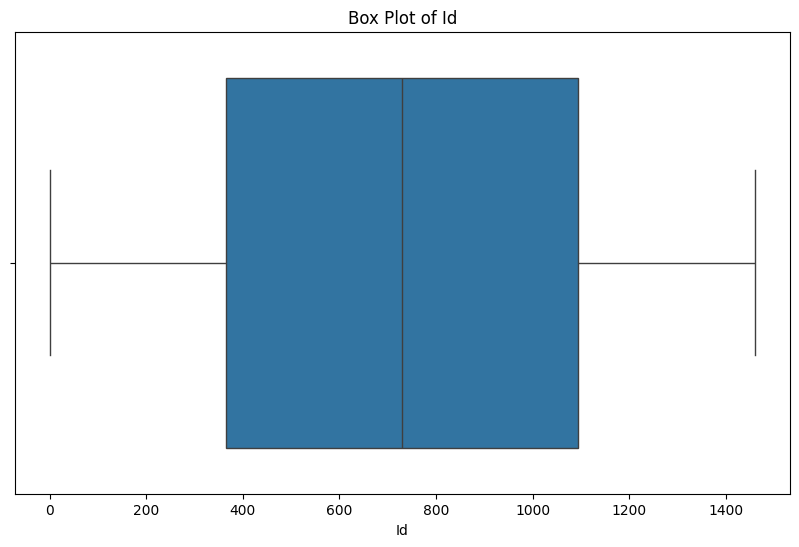

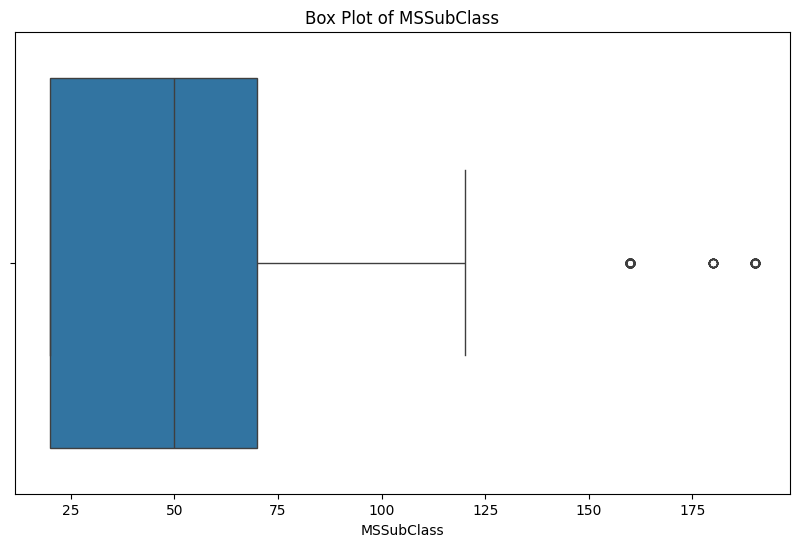

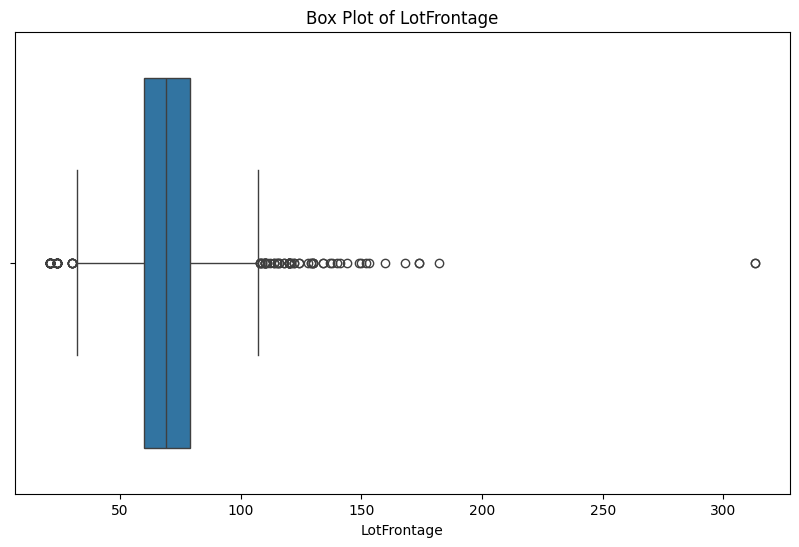

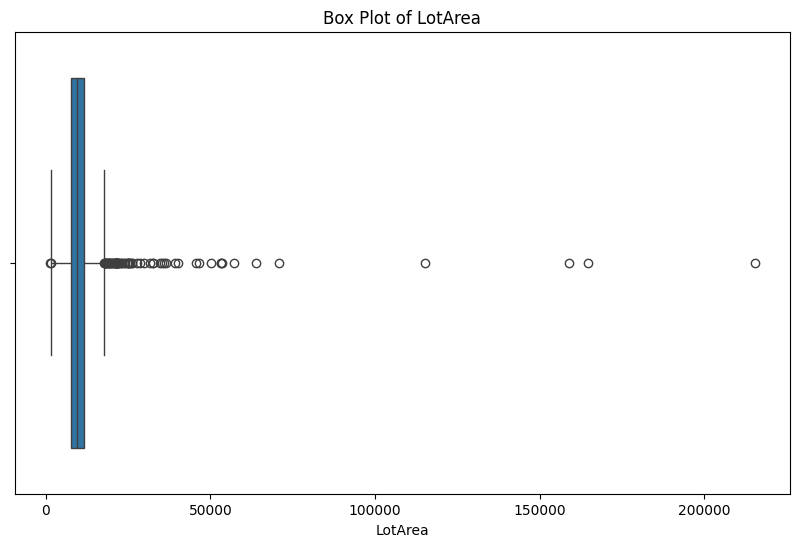

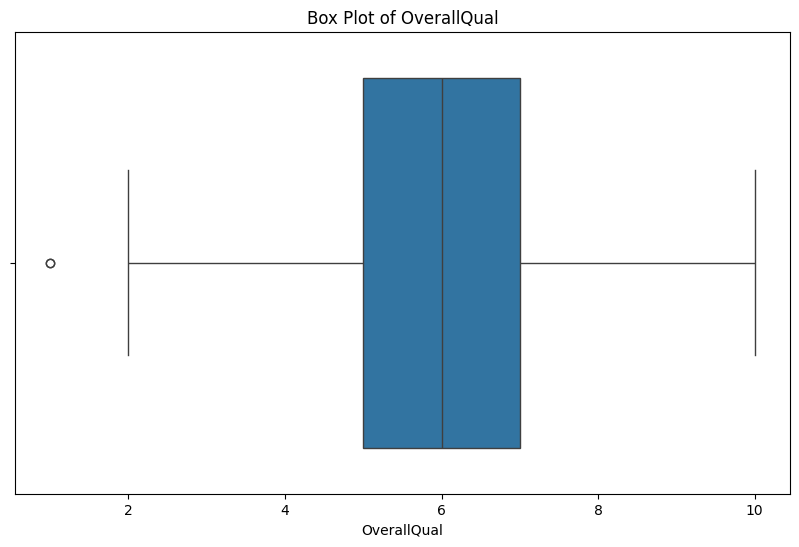

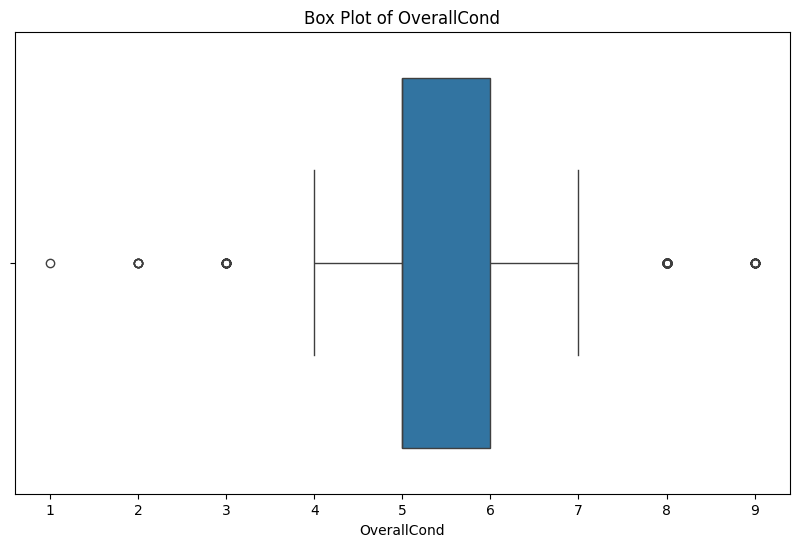

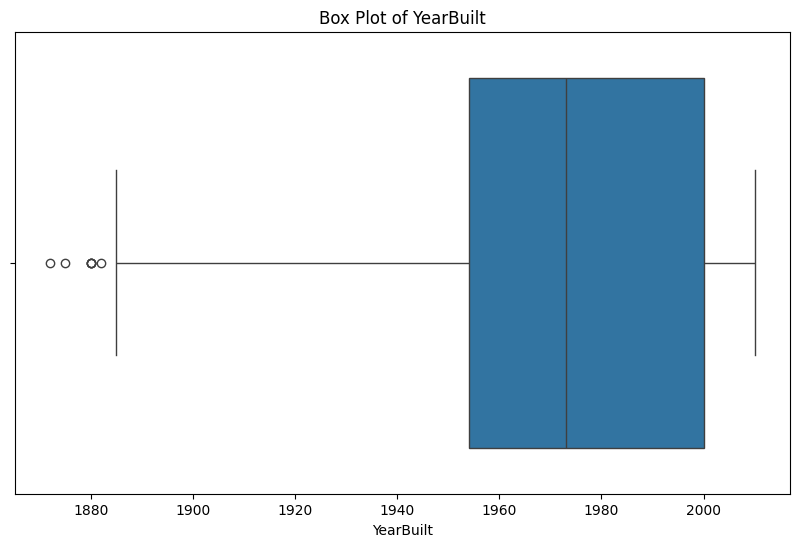

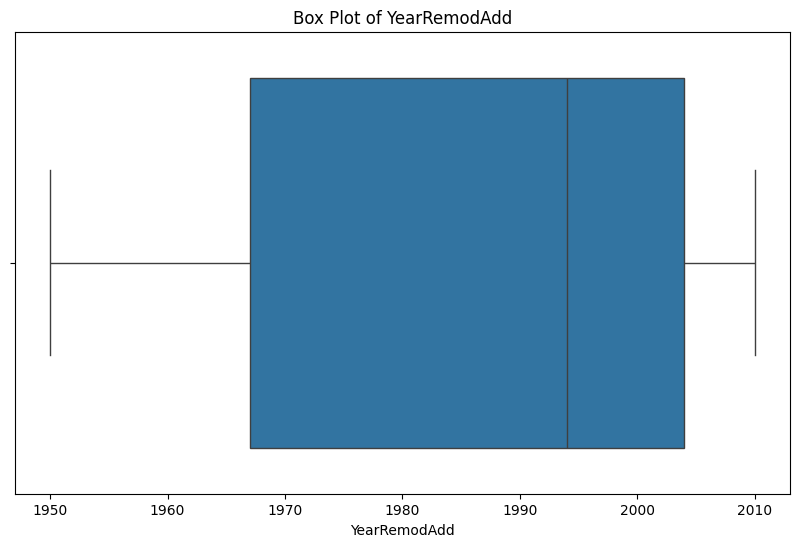

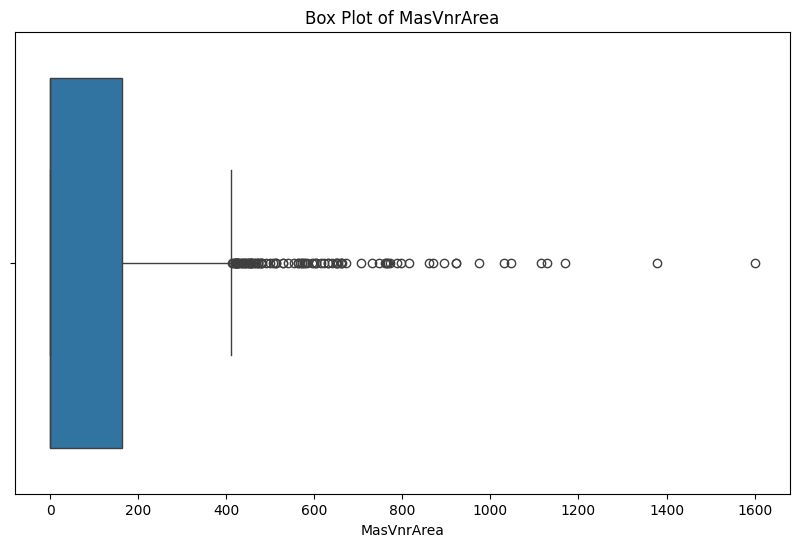

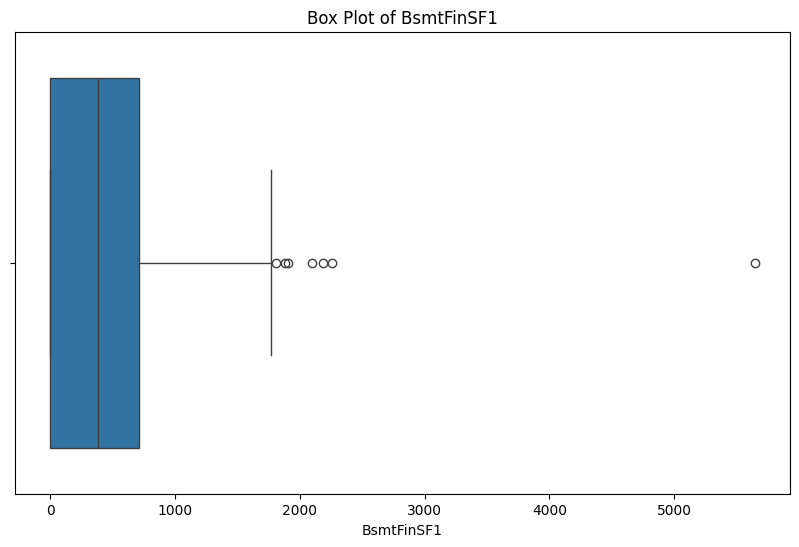

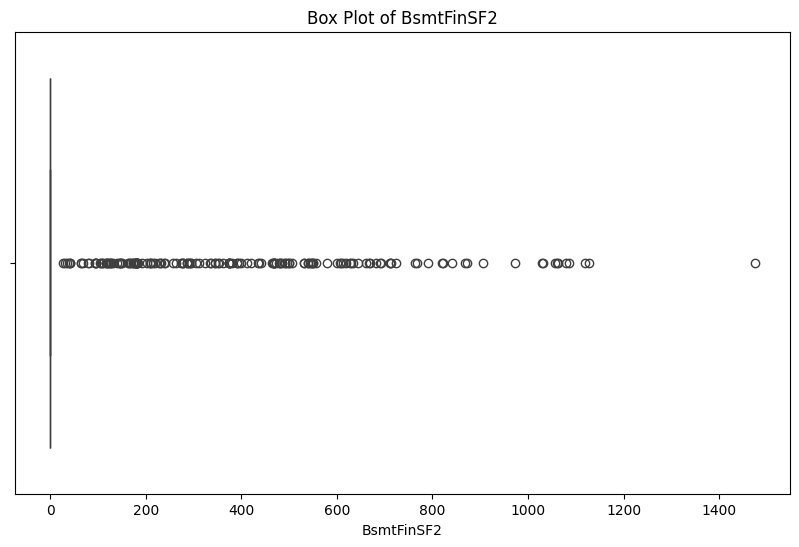

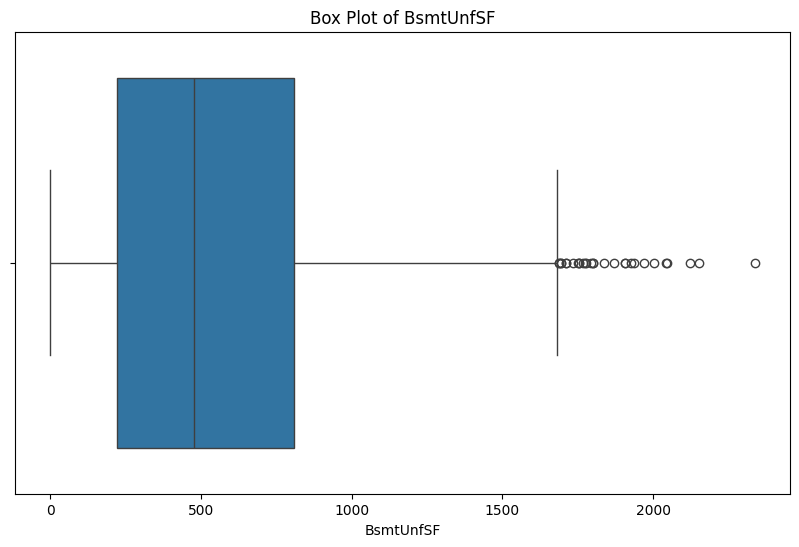

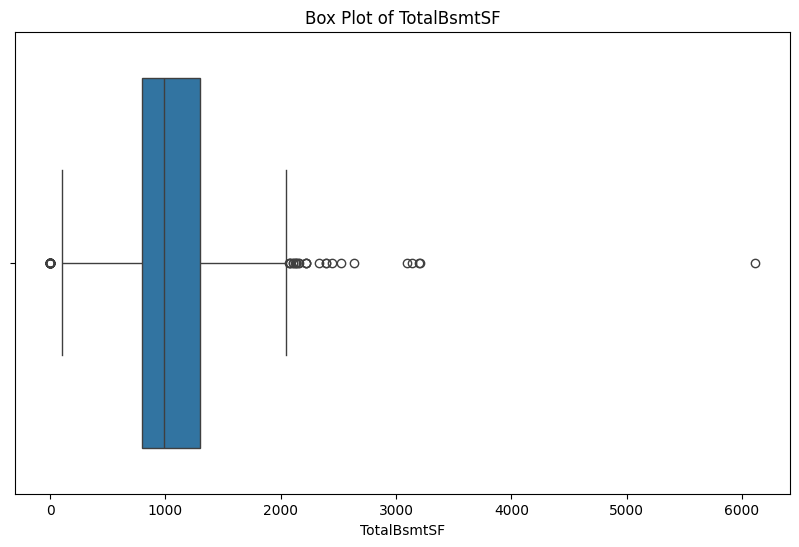

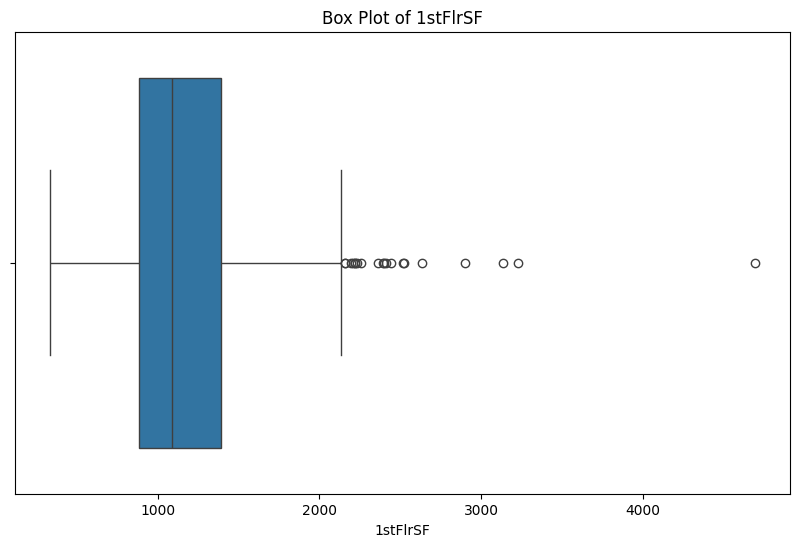

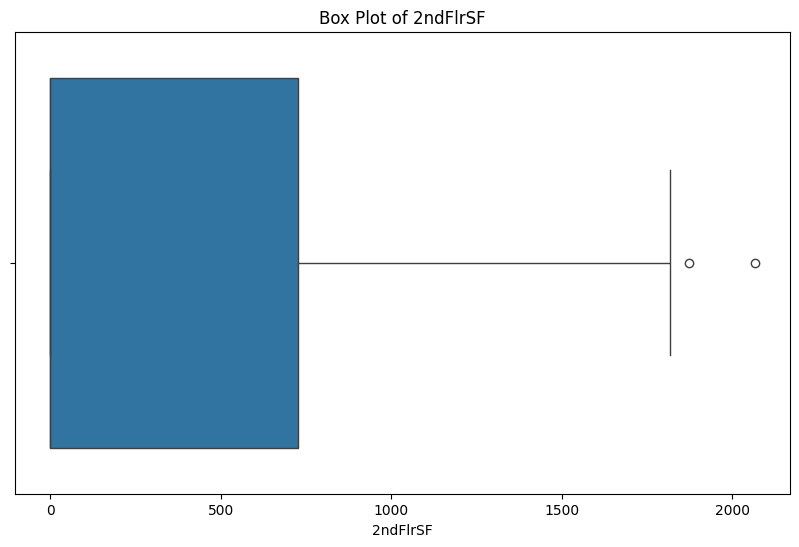

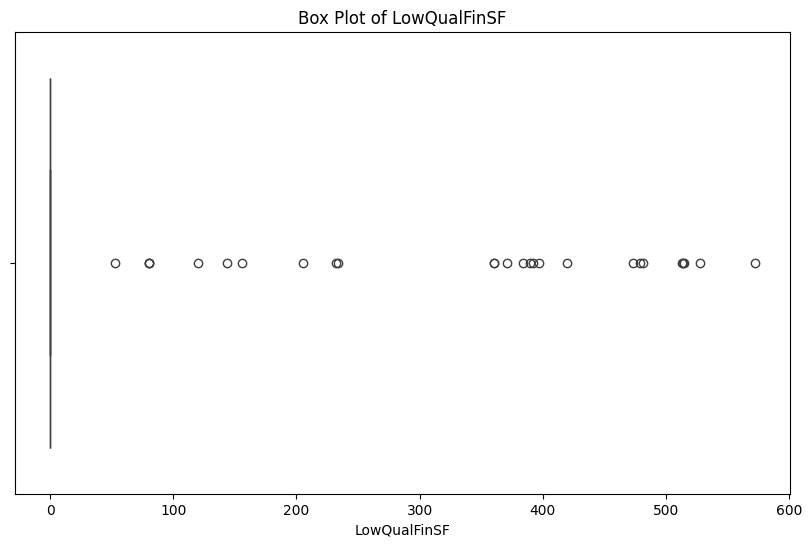

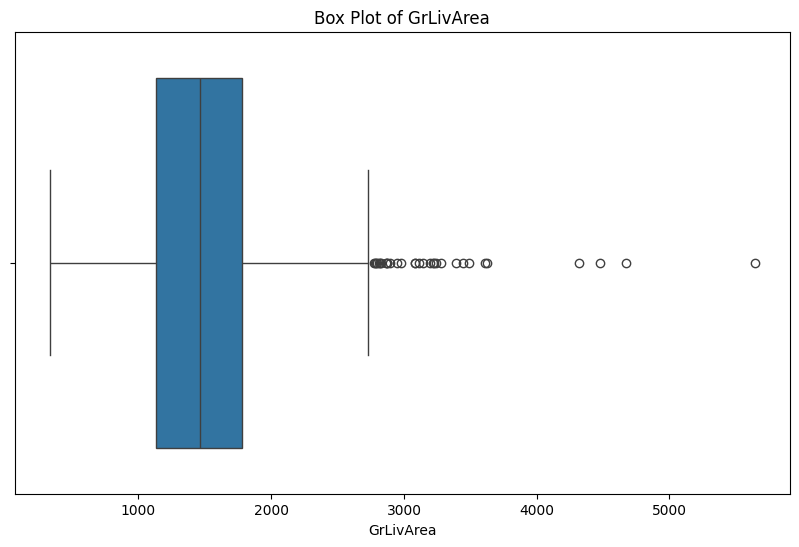

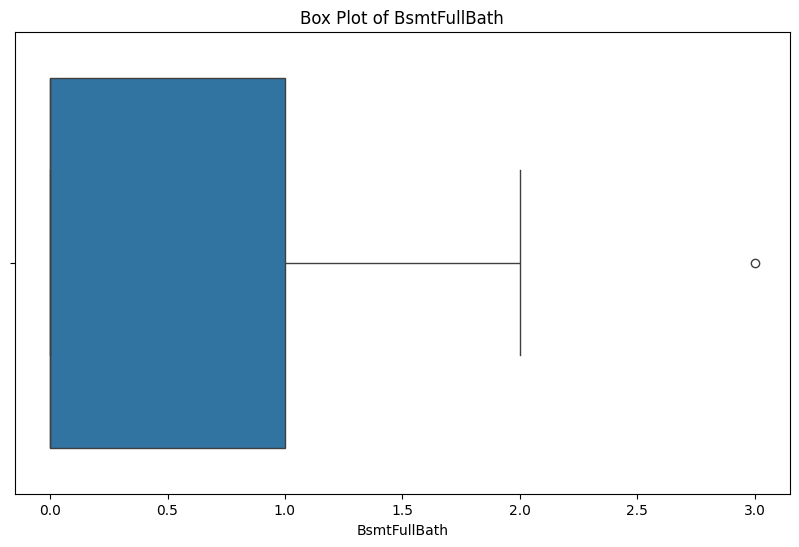

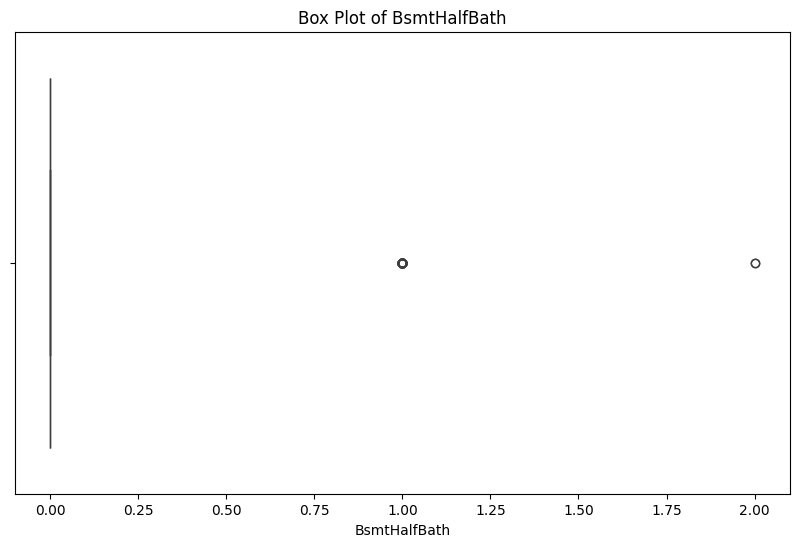

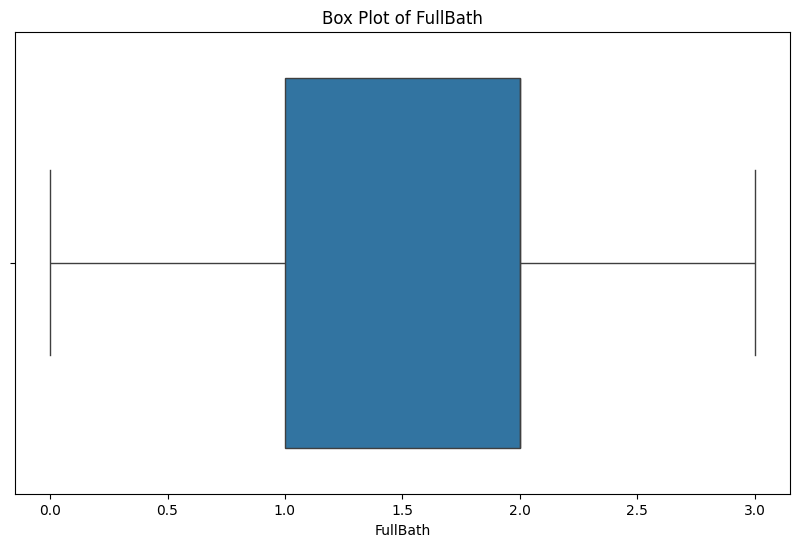

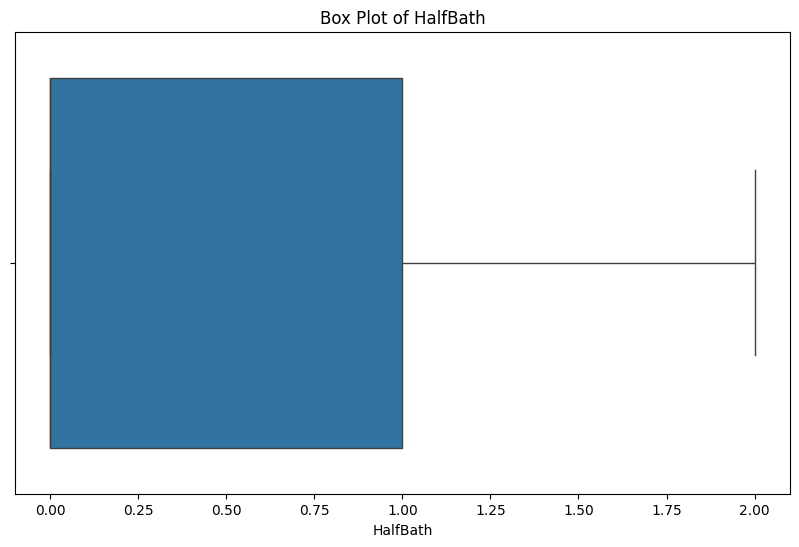

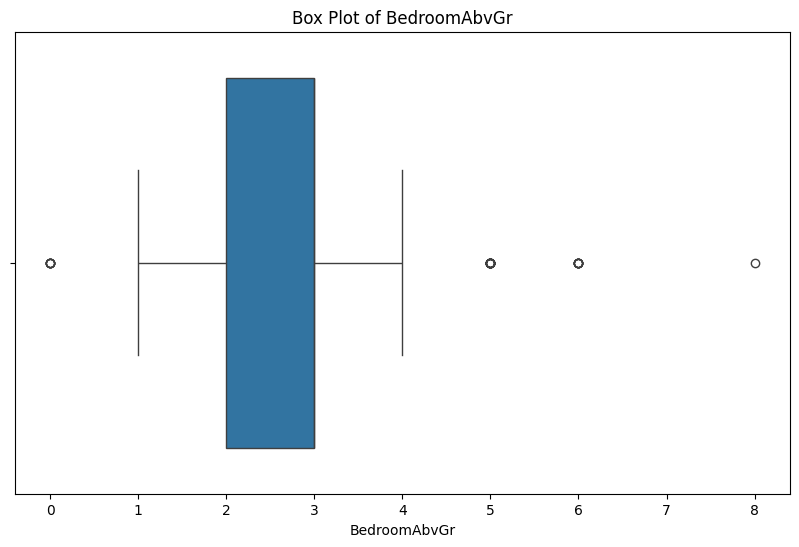

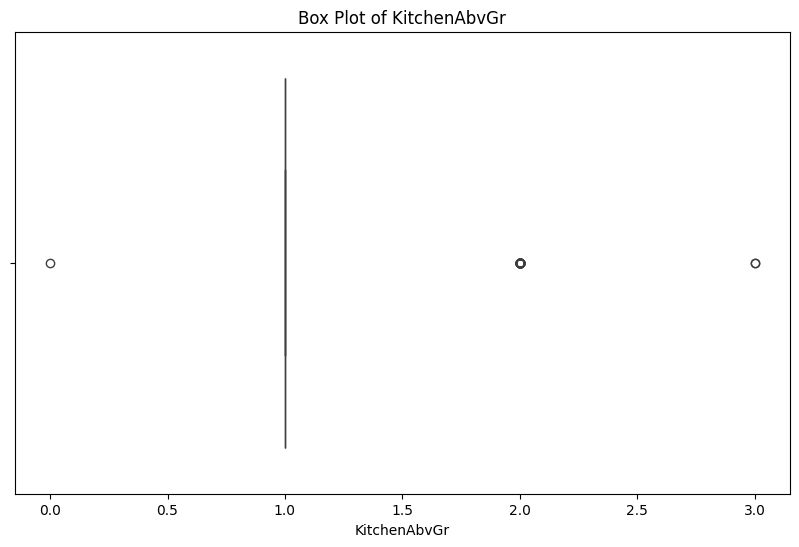

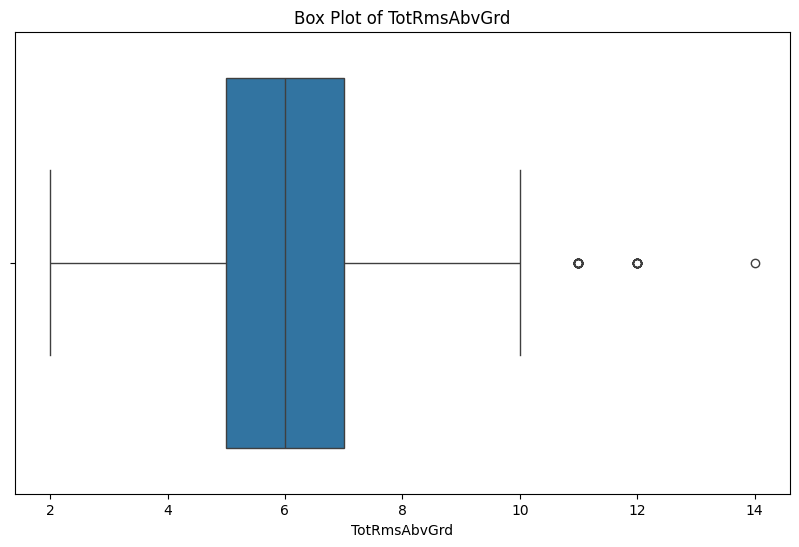

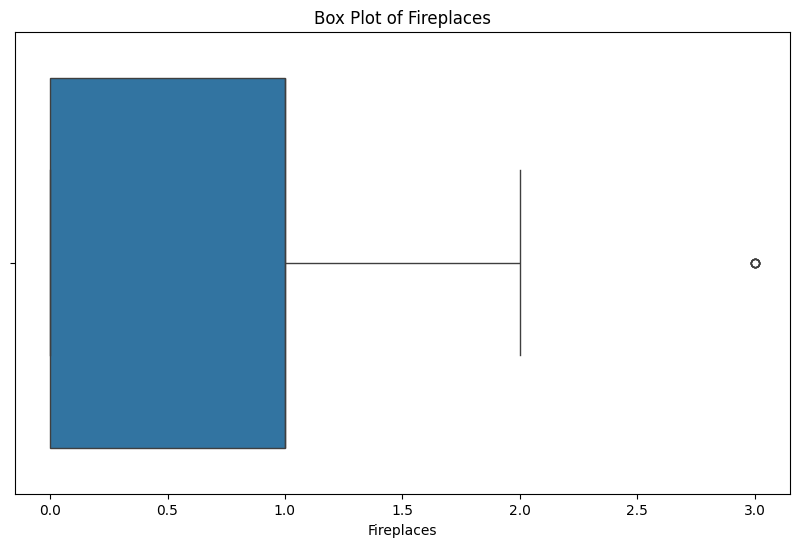

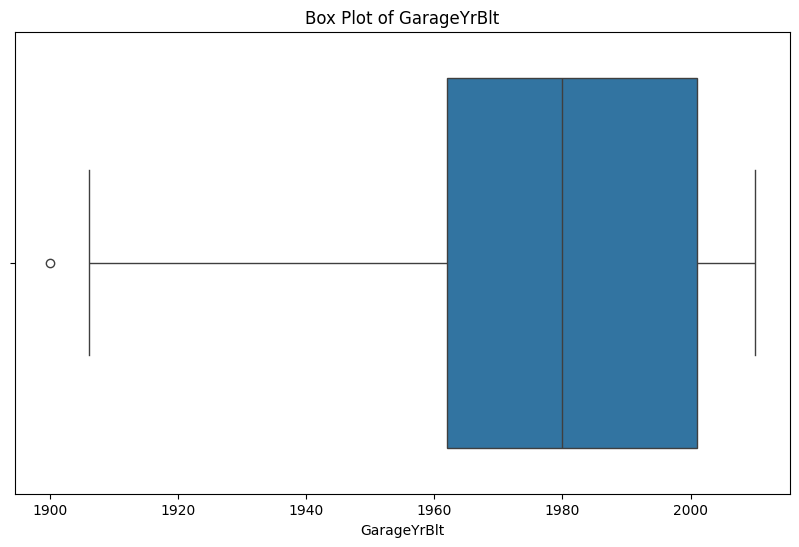

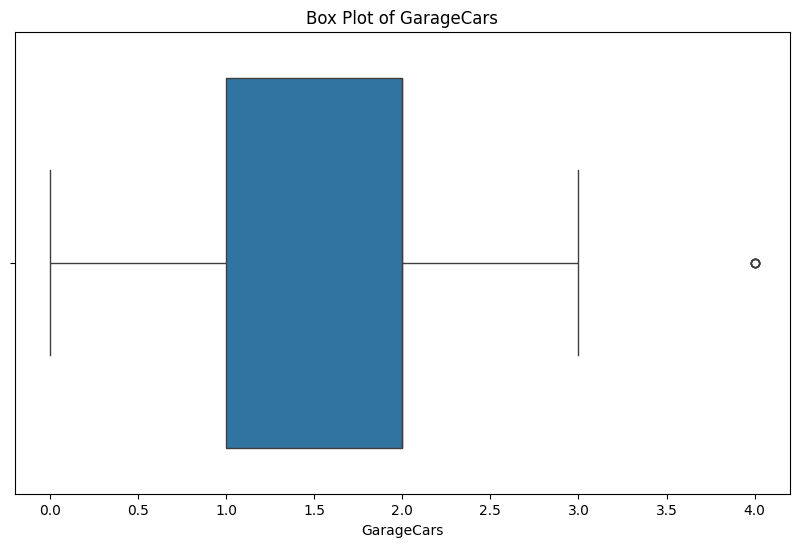

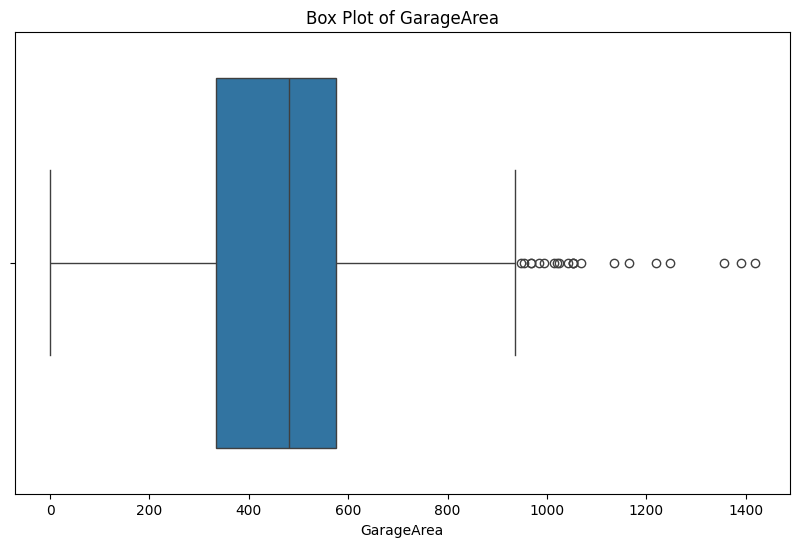

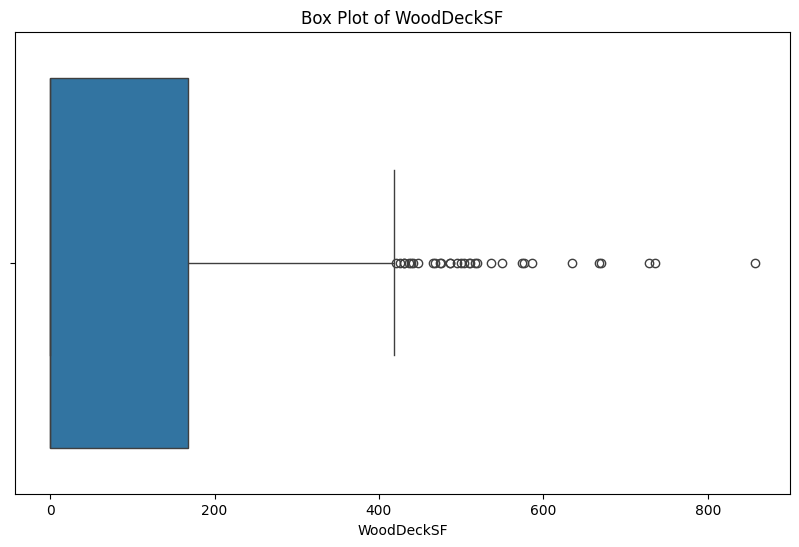

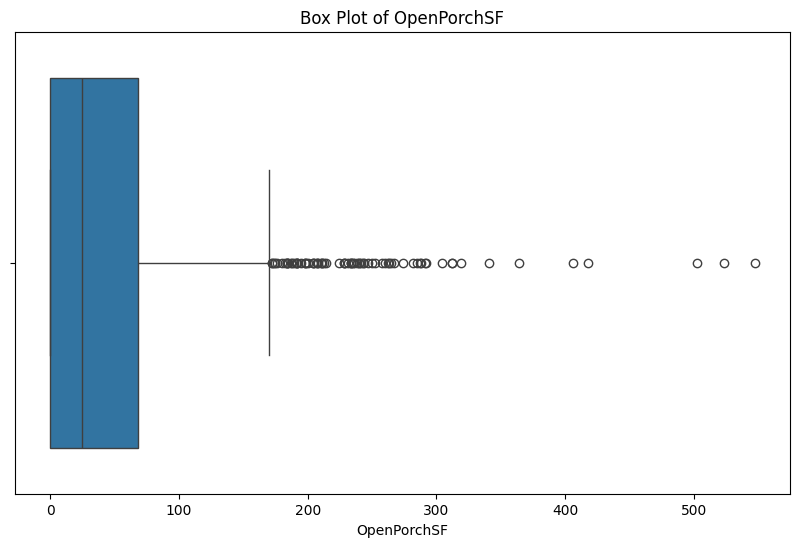

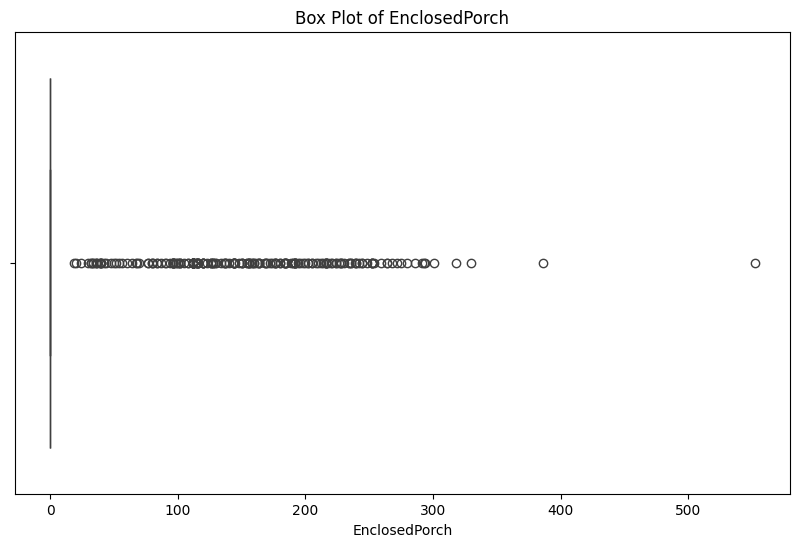

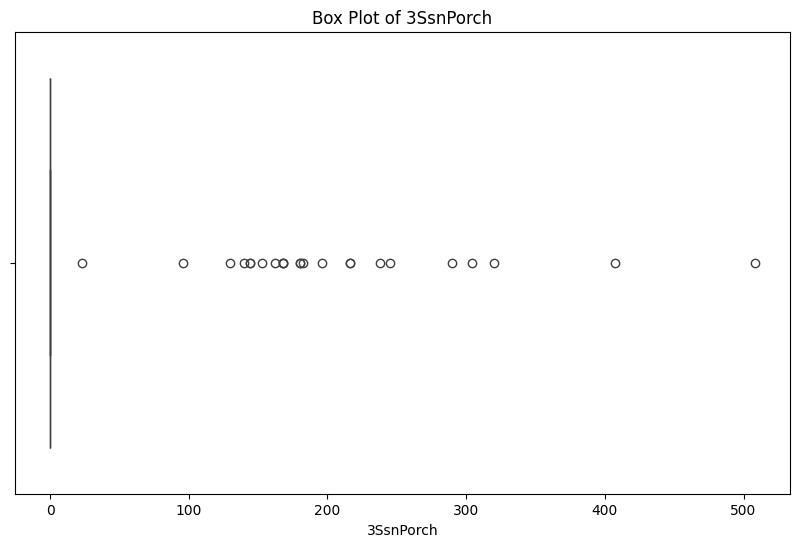

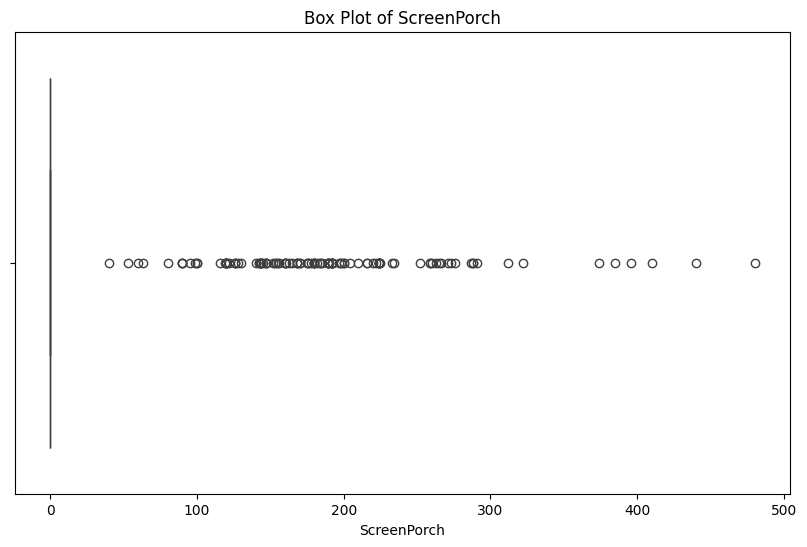

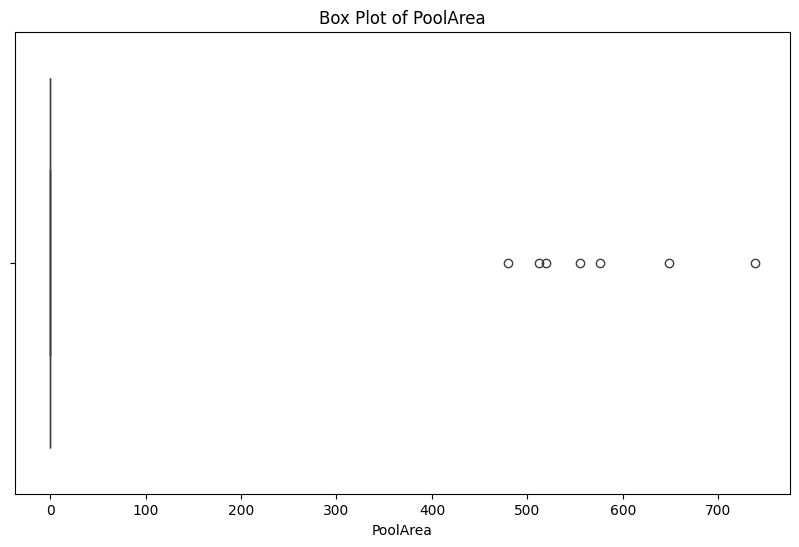

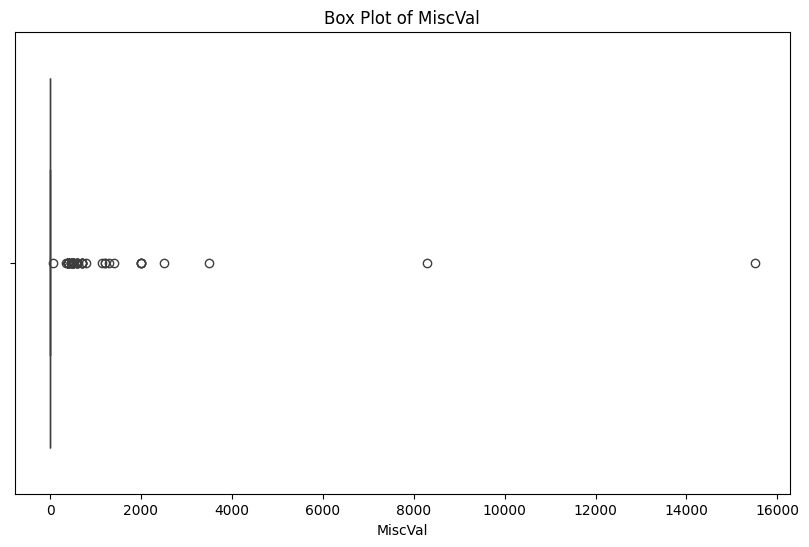

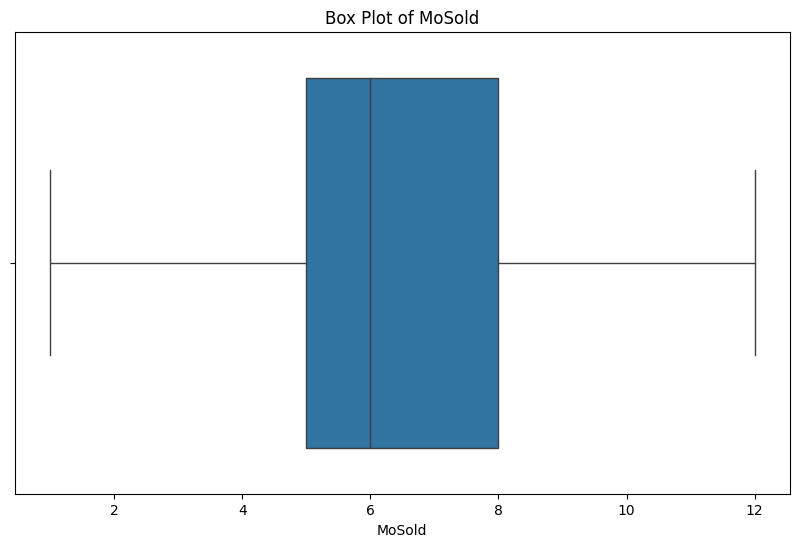

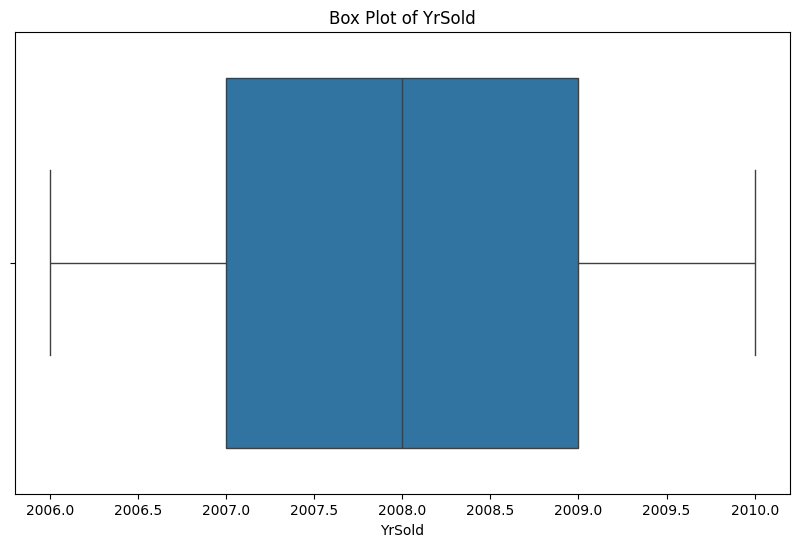

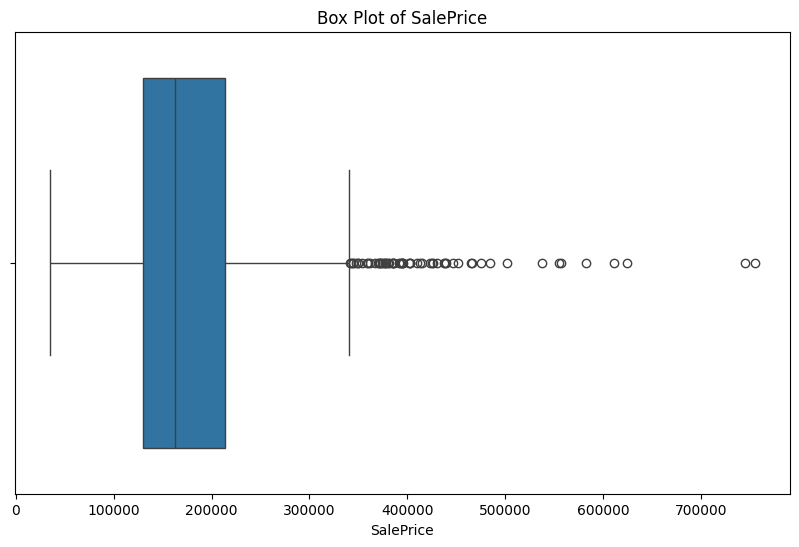

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the numeric features based on the condition
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [ ]:
# Iterate through each numeric feature to cap outliers
for column in numeric_features:
    median_val = df[column].median()
    Q1_col = Q1[column]
    Q3_col = Q3[column]
    IQR_col = IQR[column]

    # Apply the outlier capping
    df[column] = df[column].apply(lambda x: median_val if x < (Q1_col - 1.5 * IQR_col) or x > (Q3_col + 1.5 * IQR_col) else x)

In [ ]:
numeric_features = df.select_dtypes(include=['number']).columns

for column in numeric_features:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

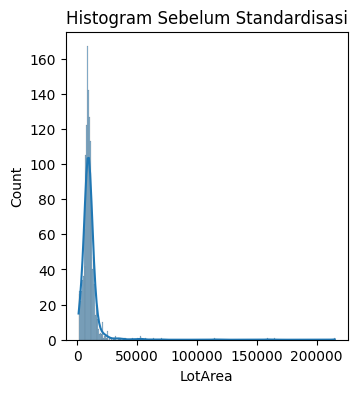

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")


Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

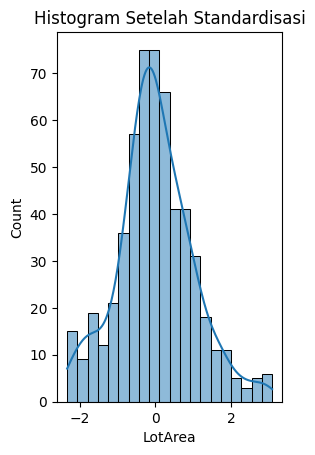

In [ ]:
#Histogram setelah di standarisasi
plt.subplot(1,2,2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

In [ ]:
duplicates= df.duplicated()

print('Baris duplikat')
print(df[duplicates])

Baris duplikat
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


In [ ]:
#menangani data duplikat dengan mengahpusnya
df=df.drop_duplicates()

print('Data setelah di hapus duplikatnya')
print(df)

Data setelah di hapus duplikatnya
            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0    -1.768952    0.356986    -0.265012 -0.284244     0.614520    -0.523677   
2    -1.764179    0.356986    -0.037099  0.744924     0.614520    -0.523677   
4    -1.759405    0.356986     1.178437  1.851281     1.419903    -0.523677   
6    -1.754632   -0.917637     0.494698  0.316349     1.419903    -0.523677   
10   -1.745085   -0.917637     0.114843  0.726546    -0.996245    -0.523677   
...        ...         ...          ...       ...          ...          ...   
1448  1.687057    0.038330     0.114843  0.934953    -1.801628     2.308244   
1451  1.694217   -0.917637     0.722611  0.014215     1.419903    -0.523677   
1453  1.698991   -0.917637     1.634263  2.938156    -0.996245    -0.523677   
1454  1.701378   -0.917637    -0.492925 -0.633426     0.614520    -0.523677   
1455  1.703764    0.356986    -0.492925 -0.480154    -0.190863    -0.523677   

      YearBuilt  

In [ ]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


Kita akan menggunakan metode one hot encoding dan label encoding karena data kategorikal yang ada pada dataset ini tidak memiliki urutan. Mari kita lakukan kedua pendekatan tersebut agar semakin terbayang perbedaannya.

In [ ]:
df_one_hot= pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


kolom yang Anda miliki bertambah sangat banyak yang asalnya berjumlah 77 menjadi 216. Hal ini karena one hot encoding akan memecah suatu fitur menjadi fitur baru dengan struktur “namakolom_value”.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_lencoder=pd.DataFrame(df)

for col in category_features:
  df_lencoder[col] = label_encoder.fit_transform(df[col])

df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


Dengan menggunakan LabelEncoder, jumlah kolom yang ada pada data tidak mengalami perubahan sama sekali. Hal ini karena LabelEncoder hanya mengubah value dari masing-masing fitur yang ia proses.

**One hot encoding dan label encoding** adalah dua teknik yang sering digunakan untuk mengubah data kategorikal menjadi format numerik yang dapat digunakan dalam algoritma machine learning. Keduanya memiliki kelebihan dan kekurangan tergantung pada konteks penggunaannya. Simak kelebihan dan kekurangan dari masing-masing encoder pada materi berikut.

In [ ]:
df_lencoder.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3


In [ ]:
missing_values = df_lencoder.isnull().sum()
missing_persen=(missing_values/len(df_lencoder))*100

missing_data=pd.DataFrame({
    'Jumlah Missing':missing_values,
    'Persen Missing':missing_persen
}).sort_values(by='Jumlah Missing', ascending=False)

missing_data[missing_data['Jumlah Missing']> 0] #emnampilkan kolom dengan missing values

,Jumlah Missing,Persen Missing


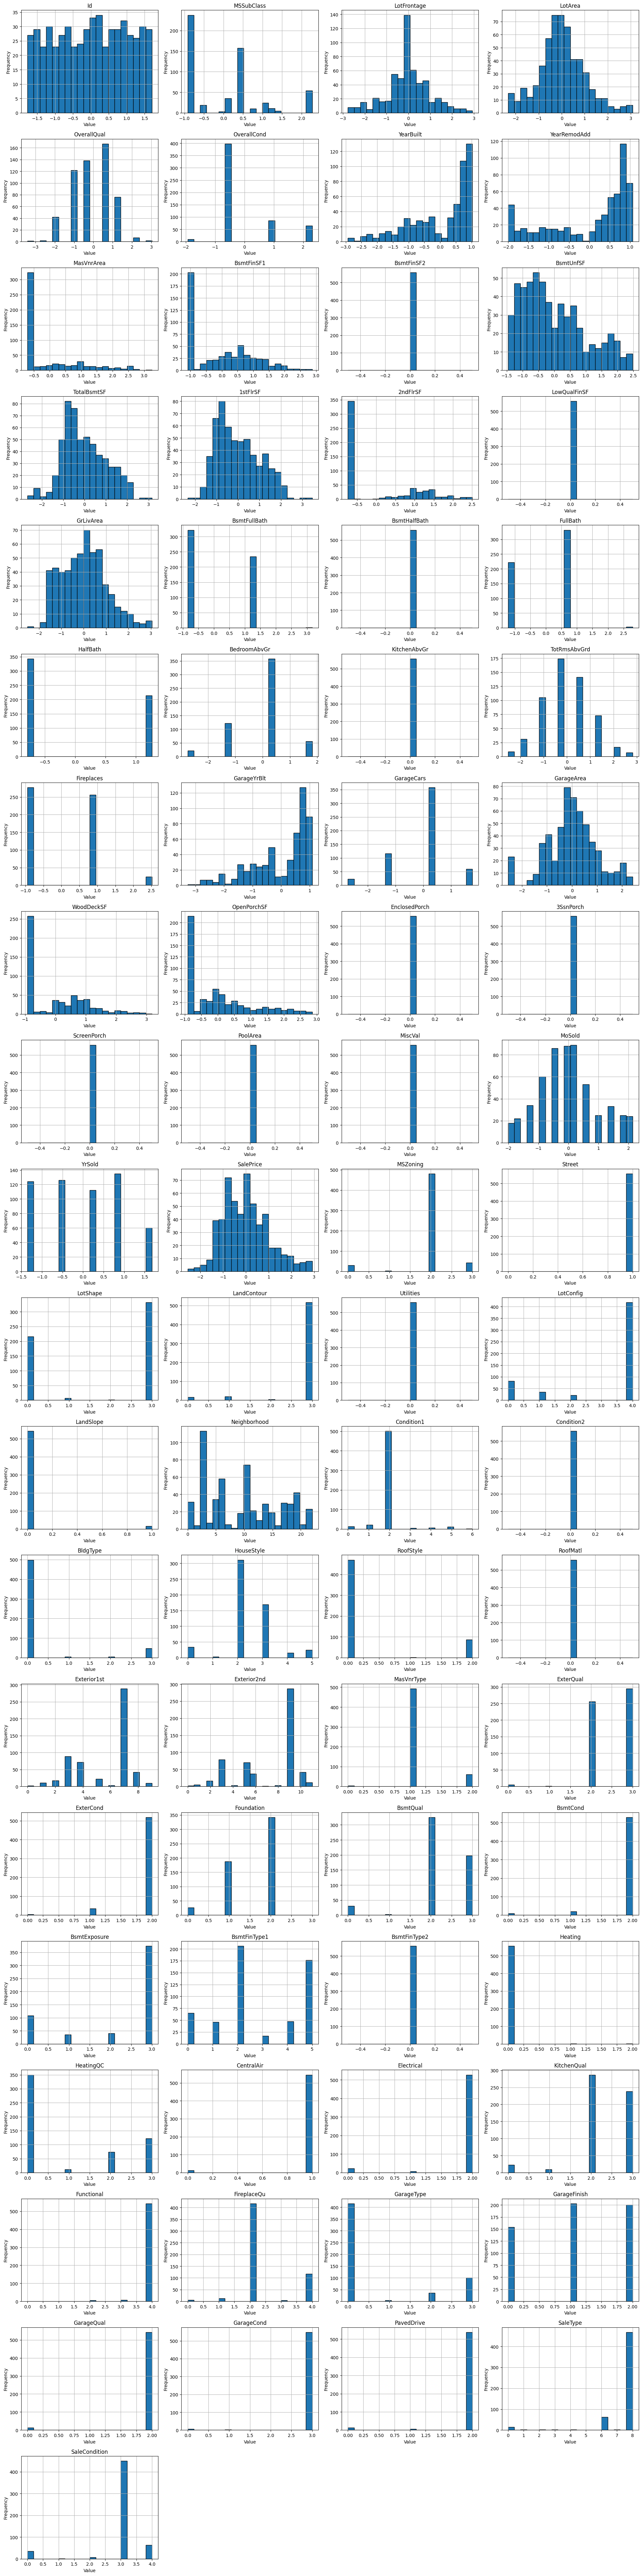

In [ ]:
#menghitung variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()


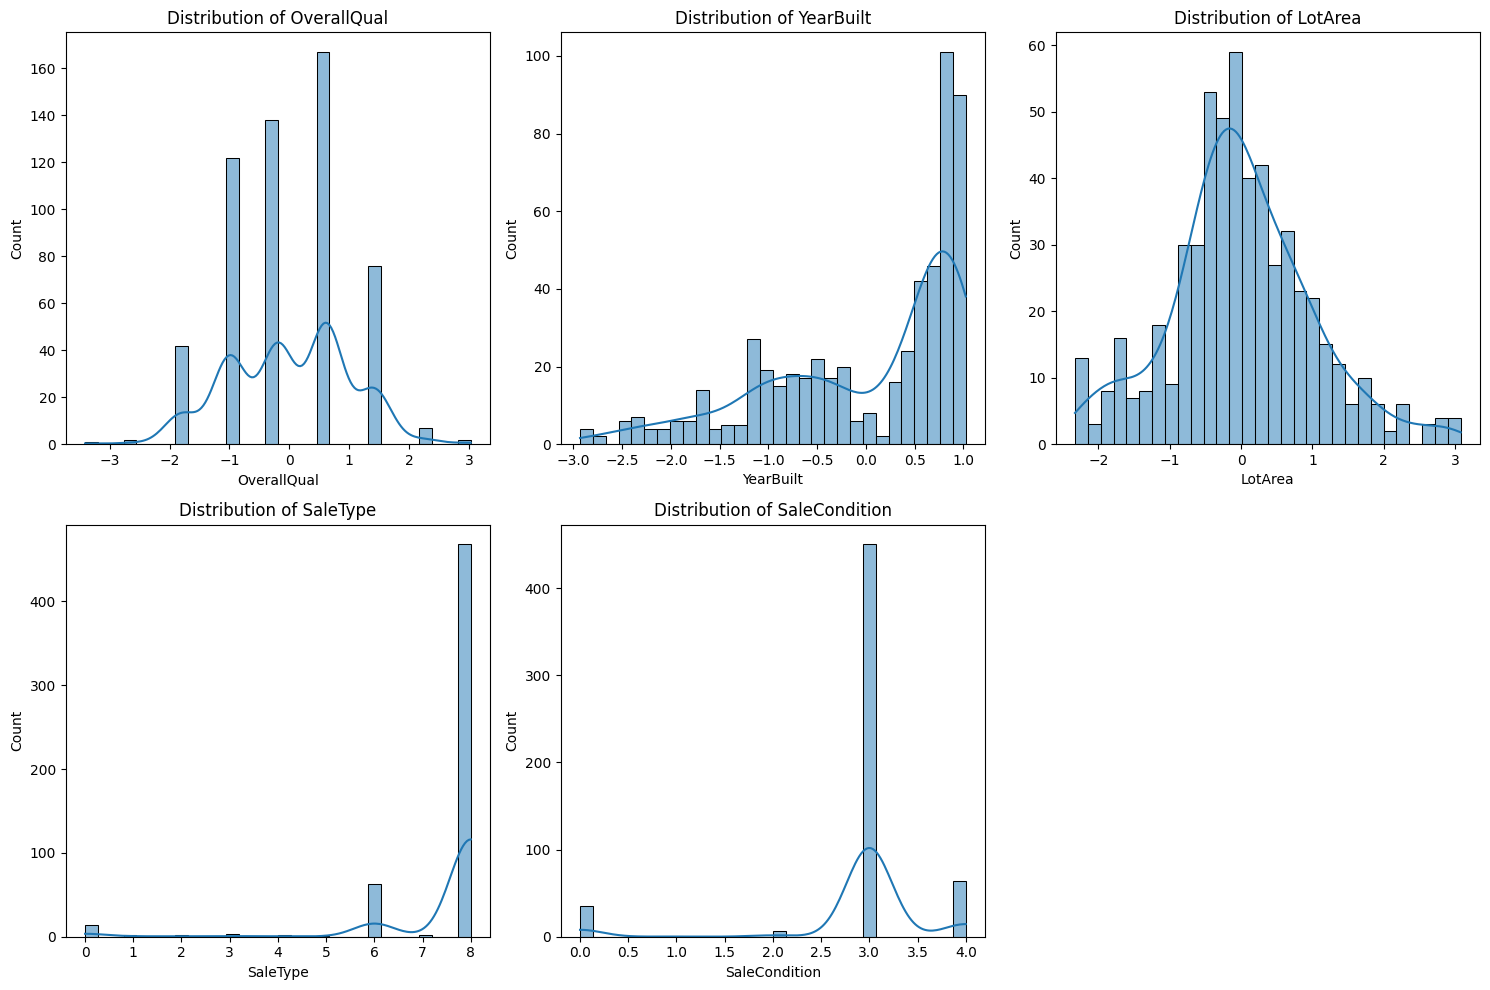

In [ ]:
#visualisasikan distribusi beberapa kolom serta melihat korelasi antara variabel numerik.

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#**Melihat korelasi**
warna yang lebih terang atau lebih gelap mengindikasikan korelasi yang lebih kuat (positif atau negatif).

**Korelasi Positif:** nilai korelasi positif menunjukkan bahwa saat satu variabel meningkat, variabel lain juga cenderung meningkat. Nilai korelasi +1 menunjukkan korelasi positif sempurna.

**Korelasi Negatif:** nilai korelasi negatif menunjukkan bahwa saat satu variabel meningkat, variabel lain cenderung menurun. Nilai korelasi -1 menunjukkan korelasi negatif sempurna.

**Korelasi Nol:** nilai korelasi 0 menunjukkan bahwa tidak ada hubungan linier antara dua variabel.

Dengan memahami korelasi antar variabel, Anda dapat memilih fitur yang akan dimasukkan ke dalam model machine learning dengan lebih baik serta memahami dinamika data secara lebih mendalam.

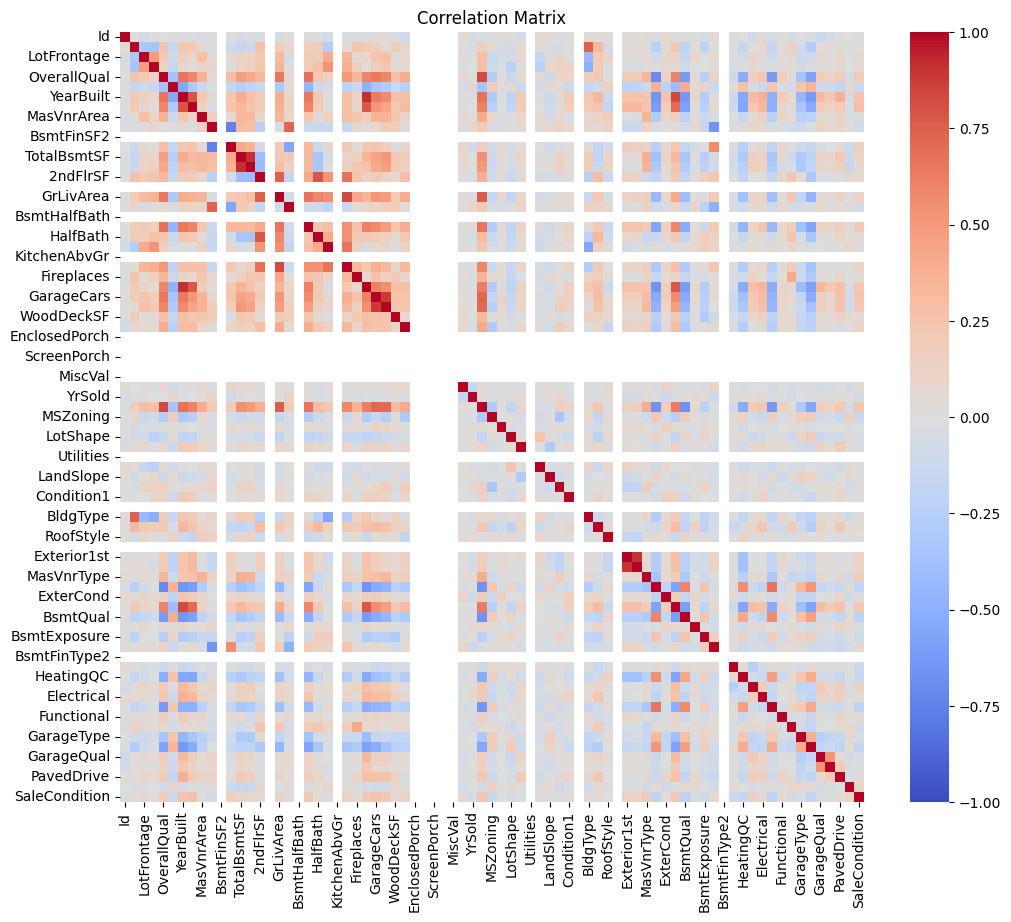

In [ ]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

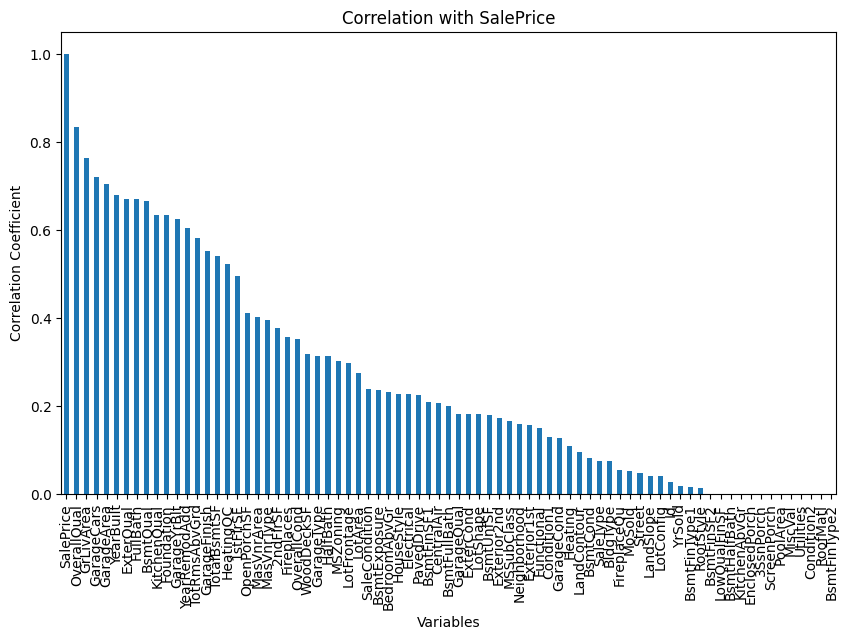

In [ ]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

X_train: (80% Data Fitur) -> Buku pelajaran untuk model belajar.

X_test: (20% Data Fitur) -> Soal ujian untuk mengetes model.

y_train: (80% Kunci Jawaban) -> Kunci jawaban untuk X_train (supaya model tahu dia benar/salah saat belajar).

y_test: (20% Kunci Jawaban Asli) -> Disimpan/disembunyikan dulu. Nanti dipakai untuk mencocokkan hasil prediksi model terhadap X_test.

In [ ]:
import sklearn

#mwmisahkan fitur  (x) dan fitur target (y)
x = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']


**X:** kumpulan atribut atau fitur dari dataset, yaitu semua kolom kecuali kolom target (pada kasus ini SalePrice).

**y:** target atau label yang akan kita prediksi merupakan kolom yang ingin kita pisahkan (pada kasus ini SalePrice).

**test_size:** persentase dari data yang akan digunakan sebagai test set. Misalnya, ketika Anda menentukan test_size=0.2, 20% dari data akan menjadi test set, dan 80% sisanya akan menjadi train set.

**random_state**: Jika kamu menjalankan kode ini hari ini, data A mungkin masuk ke Training. Jika kamu jalankan besok tanpa random_state, bisa jadi data A malah masuk ke Testing. Hasilnya akan berubah-ubah terus.

In [ ]:
from sklearn.model_selection import train_test_split

#membagi dataset menjadi training dan testing
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


1. **Selalu Gunakan random_state**: untuk memastikan hasil yang konsisten dan dapat direproduksi setiap kali Anda menjalankan kode Anda.
2. **Pertimbangkan Penggunaan stratify:** ini sangat penting jika Anda memiliki dataset dengan kelas yang tidak seimbang, karena memastikan bahwa setiap subset memiliki distribusi kelas yang sama.
3. **Evaluasi dengan Cross-Validation:** meskipun train_test_split memberikan cara sederhana untuk membagi data, cross-validation dapat memberikan evaluasi model yang lebih robust, terutama jika dataset Anda kecil. (Psst, Anda akan mempelajari metode ini pada materi berikutnya, ya!)

In [ ]:
#menghitung jumlah data
print("jumlah data:", len(x))

#menghitung jumlah data train
print("Jumlah data train :", len(X_train))

#menghitung jumlah data train
print("Jumlah data test :", len(X_test))

jumlah data: 557
Jumlah data train : 445
Jumlah data test : 112


In [ ]:
# Menghitung total data asli
total_data = len(x)

# Menghitung persentase aktual
persen_test = (len(X_test) / total_data) * 100
persen_train = (len(X_train) / total_data) * 100

print(f"Total Data Asli : {total_data}")
print(f"Data Training   : {len(X_train)} baris ({persen_train:.0f}%)")
print(f"Data Testing    : {len(X_test)} baris ({persen_test:.0f}%)")

Total Data Asli : 557
Data Training   : 445 baris (80%)
Data Testing    : 112 baris (20%)


# **Melatih Model (Training)**

In [ ]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(X_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train, y_train)

# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(X_train, y_train)


GradientBoostingRegressor(random_state=184)

# **Evaluasi Model**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#evaluasi pada model LARS
pred_lars = lars.predict(X_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars=mean_squared_error(y_test, pred_lars)
r2_lars=r2_score(y_test, pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi

data= {
    "MAE": [mae_lars],
    "MSE": [mse_lars],
    "R2": [r2_lars]

}

## Konversi dictionary menjadi DataFrame
df_results=pd.DataFrame(data, index=["Lars"])
df_results

,MAE,MSE,R2
Lars,0.666904,0.726562,0.216688


In [ ]:
#evaluasi model LR
pred_LR=LR.predict(X_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

data= {
    "MAE": [mae_LR],
    "MSE": [mse_LR],
    "R2": [r2_LR]

}

# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.666904,0.726562,0.216688
Linear Regression,0.241011,0.104287,0.887567


In [ ]:
# Evaluasi pada model Gradient Boosting Regressor
pred_GBR = GBR.predict(X_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

# Menambahkan hasil evaluasi GBR ke DataFrame
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.666904,0.726562,0.216688
Linear Regression,0.241011,0.104287,0.887567
GradientBoostingRegressor,0.218814,0.107409,0.884202


In [ ]:
import joblib

# Asumsi nama variabel model Linear Regression kamu adalah 'LR' atau 'linear_model'
model_juara = LR

# Beri nama file yang sesuai
Linear_model = 'linear_regression_model.joblib'

# Simpan Sang Juara
joblib.dump(model_juara, Linear_model)

print(f"Model terbaik ({Linear_model}) berhasil disimpan dengan Joblib!")

Model terbaik (linear_regression_model.joblib) berhasil disimpan dengan Joblib!
